# Advanced Machine Learning (2019 MOD006566 TRI1 F01CAM)

### Element 010

### Student ID: 0925739

## Component 1: Turnitin Data Analysis Code Submission

To conduct exploratory data analysis, lets first load the titanic dataset. 
Three files are given: *train.csv*, *text.csv* and *gender_submission.csv*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

A data analyst's first task is usually to see what the data contains. Lets see the first 5 lines for all files.

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


*gender_submission.csv* is the submission format for kaggle which can be ignored for Component 1 of assessment.<br>
*train.csv* (training set) and *test.csv* (test set) look similar but test seems to have less columns; lets confirm that.

In [5]:
print('Shape of train.csv      : ', train.shape)
print('Columns in train.csv    : ', train.columns.to_list())
print('==================================================================')
print('Shape of test.csv       : ', test.shape)
print('Columns in test.csv     : ', test.columns.to_list())

Shape of train.csv      :  (891, 12)
Columns in train.csv    :  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Shape of test.csv       :  (418, 11)
Columns in test.csv     :  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


As seen, *train.csv* has 12 columns whereas *test.csv* has 11 columns.<br>
This means one of the columns in *train.csv* is the y-value (target), and all other columns represent X-values(features)<br>
Below is the code to find out the name of the column(s) missing from the test set.

In [6]:
for column in train.columns.to_list():
    if column not in test.columns.to_list():
        print(column)

Survived


Great! The **'Survived'** column is what's missing in our test dataset. Machine Learning algorithms in Component 2 will help to predict that.<br>
We could have easily noticed that by inspecting the first 5 lines in both *train.csv* and *test.csv*, 
but the above is a better method for such task when there are numerous columns and human-eye may not spot it easily.<br><br>
Lets see the datatypes and their counts in each of the datasets.

In [7]:
print('Training set: \n', train.dtypes.value_counts())      # \n adds new line
print('================')                                   # ===== added for better visibility
print('Test set: \n', test.dtypes.value_counts())

Training set: 
 int64      5
object     5
float64    2
dtype: int64
Test set: 
 object     5
int64      4
float64    2
dtype: int64


The results are as expected. the only dissimilar aspect between training and test set is
that test set is missing one of the int64 datatype columns which is the 'Survived' column.<br><br>
Now lets see how the data sets suffer from missing values.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

It seems that training set suffers from 177, 687 and 2 null value in **'Age'**, **'Cabin'**, and **'Embarked'** columns respectively.<br>
Similarly, test set suffers from 86, 1, and 327 null values in **'Age'**, **'Fare'** and **'Cabin'** columns.<br>
The columns of concern for a data analyst are the columns with high null values. The object type columns will require feature engineering.

Function below will print related information about our columns.

In [12]:
train.name = 'train'
def print_info(dataframe, col_name):
    print("""%s[\"%s\"] \n ======================================================================="""
                              %(dataframe.name, col_name))
    column = dataframe[col_name]
    print('Data Type                   : ', column.dtype)
    print('Number of missing values    : ', column
                                .isnull().sum())
    print('Percentage of missing values: ',(column
                                .isnull().sum()/train.shape[0])*100,'%')
    column_unique = column.unique()
    print('Number of unique values     : ', column_unique.shape[0])
    print('Percentage of unique values : ', (column_unique.shape[0]
                                             /train.shape[0]*100), '%')
    print('First 50 unique values:\n ------------------ \n %s' %column_unique[:50])

Using the function on a dataframe column will help print basic info.

In [13]:
print_info(train, 'PassengerId')

train["PassengerId"] 
Data Type                   :  int64
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  891
Percentage of unique values :  100.0 %
First 50 unique values:
 ------------------ 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


The **'PassengerID'** column is just consecutive ID numbers assigned to each
passenger in our dataset.

train["Pclass"] 
Data Type                   :  int64
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  3
Percentage of unique values :  0.33670033670033667 %
First 50 unique values:
 ------------------ 
 [3 1 2]


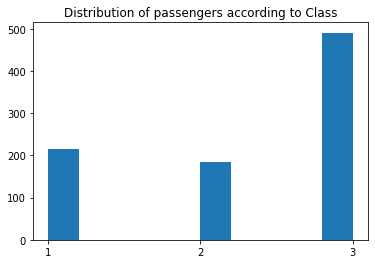

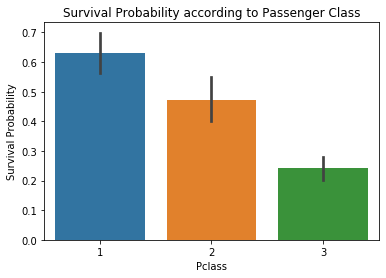

In [14]:
print_info(train, 'Pclass')
plt.hist(train['Pclass'])
plt.title('Distribution of passengers according to Class')
plt.xticks([1,2,3])
plt.show()
sns.barplot(data=train, x='Pclass', y='Survived');
plt.title('Survival Probability according to Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

As noticed, the **'Pclass'** column consists of the passenger classes ranging
1st, 2nd and 3rd and they have been numberically represented as 1,2 and 3.

train["Survived"] 
Data Type                   :  int64
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  2
Percentage of unique values :  0.22446689113355783 %
First 50 unique values:
 ------------------ 
 [0 1]


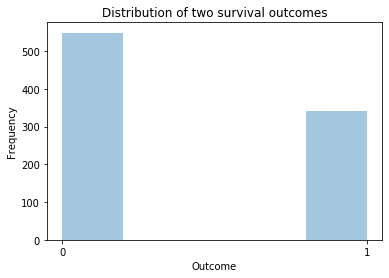

In [15]:
print_info(train, 'Survived')
ax = sns.distplot(train['Survived'], kde=False)
plt.xticks([0,1])
# plt.xticklabels(['Not-Survived', 'Survived'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of two survival outcomes')
plt.show()

The **'Survived'** column has boolean values numerically codified 0 and 1.
1 means the passenger survived and 0 means the passenger did not survive.

In [16]:
print_info(train, 'Name')

train["Name"] 
Data Type                   :  object
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  891
Percentage of unique values :  100.0 %
First 50 unique values:
 ------------------ 
 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Mis

The **'Name'** column consists of passenger names that are object type
and all are unique.
Name of the person is unlikely to have any effect on passenger's survival.<br>
However, it extracting the different Titles of the passengers can create valuable information. This could be a new feature where different passengers are classified according to their titles.

Below is an efficient way to extract this information using Python regular expression within a lambda function applied to the **'Name'** column.

The *re.findall* regular expression will extract the text between a comma(,) and a dot(.) which seems to work with how **'Name'** column stores names of passengers. As it returns the title within a list, [0] is to mean the first(and only) element.<br>
Function .strip is used to remove the space between the comma(,) and the first letter of the title extracted.

In [17]:
import re
train['Title'] = train['Name'].apply(lambda row: re.findall(',(.*?)\.', row)[0].strip())

It is time to check the first 5 elements of the dataframe to see whether
there is now a new column called **'Title'** with extracted titles.

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
print_info(train, 'Title')

train["Title"] 
Data Type                   :  object
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  17
Percentage of unique values :  1.9079685746352413 %
First 50 unique values:
 ------------------ 
 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


This is a very interesting result. A small number of unique titles that are shared by the passengers. Below is a code to see the number of each unique values in this column.

In [20]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Jonkheer          1
Sir               1
Don               1
Mme               1
the Countess      1
Ms                1
Capt              1
Name: Title, dtype: int64

Some of the titles are unique due to being in French.
Renaming French titles to English is a good data wrangling practice.
The titles with less than 5 samples are grouped into 'special' title below.

In [21]:
train['Title'].replace('Mlle', 'Miss', inplace=True) 
                        #Mademoiselle in French to Miss
train['Title'].replace('Mme', 'Mrs', inplace=True)
                        #Woman in French to Mrs
train['Title'].replace('Ms', 'Miss', inplace=True) 
                        #Ms to Mrs

train['Title'].replace(['Col', 'Major', 'Capt', 'Jonkheer',
                        'Sir', 'the Countess', 'Don', 'Lady']
                        , 'Special', inplace=True)

Value counts for all titles below after the changes.<br>
And below is the plot of the distrbutions of all titles and each title's aggregated survival probability.

     index  Title
0       Mr    517
1     Miss    185
2      Mrs    126
3   Master     40
4  Special     10
5       Dr      7
6      Rev      6


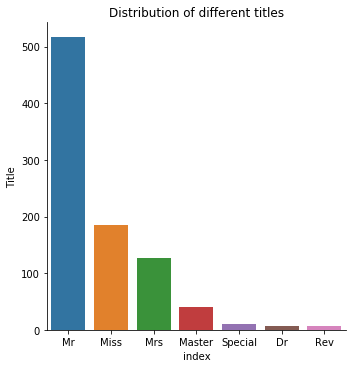

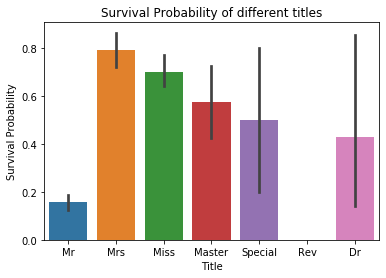

In [22]:
h = pd.DataFrame(train['Title'].value_counts()).reset_index()
print(h)

sns.catplot(data=h, x='index', y='Title', kind='bar')
plt.title('Distribution of different titles')
plt.show()

sns.barplot(data=train, x='Title', y='Survived')
plt.title('Survival Probability of different titles')
plt.ylabel('Survival Probability')
plt.show()


In [23]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


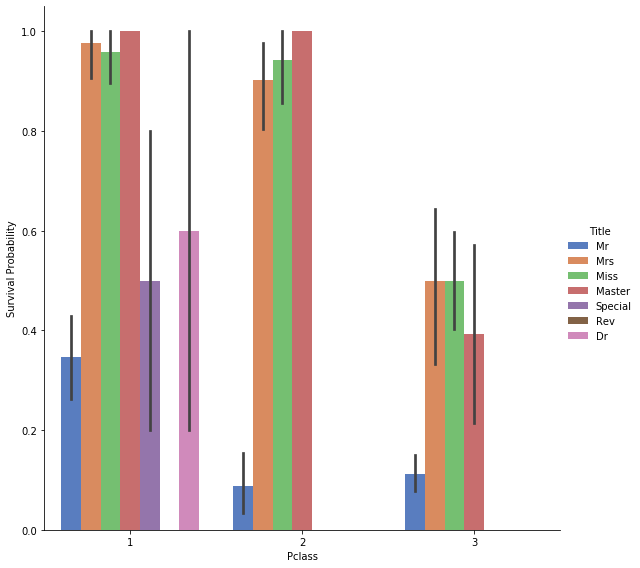

In [24]:
sns.catplot(x="Pclass", y="Survived", hue="Title", data=train,
                height=8, kind="bar", palette="muted");
plt.ylabel('Survival Probability');


It is interesting to see how some titles dont appear in some passenger classes.

Moving on, next column to explore is **'Sex'**.

train["Sex"] 
Data Type                   :  object
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  2
Percentage of unique values :  0.22446689113355783 %
First 50 unique values:
 ------------------ 
 ['male' 'female']


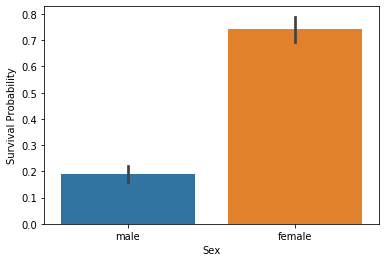

In [25]:
print_info(train, 'Sex')
ax=sns.barplot(data=train, x='Sex', y='Survived');
plt.ylabel('Survival Probability');

The **'Sex'** column can be mapped to 0 and 1 where 0 means female and 1 means male.

In [26]:
train['Sex'] = train['Sex'].map({'female':0, 'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


Moving on, next column to explore is **'Age'**. Distrbution is also plotted.

train["Age"] 
Data Type                   :  float64
Number of missing values    :  177
Percentage of missing values:  19.865319865319865 %
Number of unique values     :  89
Percentage of unique values :  9.988776655443322 %
First 50 unique values:
 ------------------ 
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5 ]


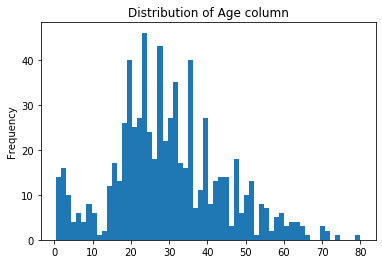

In [27]:
print_info(train, 'Age')
train['Age'].plot.hist(bins=60);
plt.title('Distribution of Age column');
plt.show()

The distribution is fairly normal. The missing values will be dealt later once all columns are explored.

Next column to explore are SibSp and Parch. SibSp refers to Sibling/Spouse aboard and Parch refers to Parent/Child aboard.

In [28]:
print_info(train, 'SibSp')

train["SibSp"] 
Data Type                   :  int64
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  7
Percentage of unique values :  0.7856341189674524 %
First 50 unique values:
 ------------------ 
 [1 0 3 4 2 5 8]


In [29]:
print_info(train,'Parch')

train["Parch"] 
Data Type                   :  int64
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  7
Percentage of unique values :  0.7856341189674524 %
First 50 unique values:
 ------------------ 
 [0 1 2 5 3 4 6]


These two columns can be combined to form a new column named Family Aboard by adding values in each.

In [30]:
train['Family Aboard'] = train['SibSp'] + train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Aboard
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0


Next there is the **'Ticket'** column consisting of ticket numbers of all passengers which is explored below.

In [31]:
print_info(train, 'Ticket')

train["Ticket"] 
Data Type                   :  object
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  681
Percentage of unique values :  76.43097643097643 %
First 50 unique values:
 ------------------ 
 ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295']


As this is object type column, it should be used to extract information. The data itself is variable in format as some
start with letters followed by numbers whereas some only have numbers. As there are 76% unique values, it could be inferred
that some passengers are sharing the same ticket numbers. They must be travelling together. But it may not always be the case.

In the below code, two conditions are used to infer whether a customer is travelling alone.
If the customer has unique ticket number or if his/her Family Aboard is less than 1, it could be inferred that he/she is travelling alone. A new column Alone is created where 1 means alone and 0 means not-alone.

In [32]:
train['Alone'] = train.apply(lambda row: 0 if (train[train['Ticket'] == row['Ticket']].shape[0]>1)
                                            | (row['Family Aboard']>0)
                                                  else 1, axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Aboard,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1


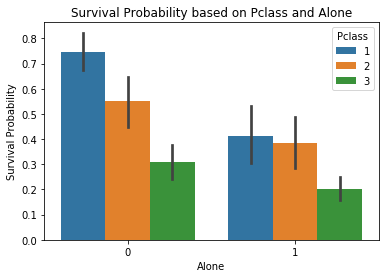

In [33]:
ax=sns.barplot(data=train, x='Alone', y='Survived', hue='Pclass');
plt.ylabel('Survival Probability');
plt.title('Survival Probability based on Pclass and Alone');

It is good to have a new feature created using other featues within the row.

Now, moving to next column which is **'Fare'** which is the total fare paid by each passenger.

train["Fare"] 
Data Type                   :  float64
Number of missing values    :  0
Percentage of missing values:  0.0 %
Number of unique values     :  248
Percentage of unique values :  27.83389450056117 %
First 50 unique values:
 ------------------ 
 [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458]


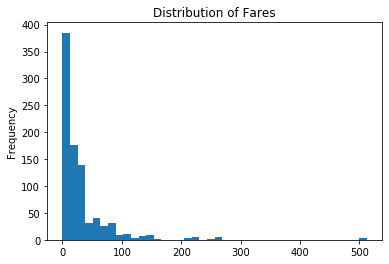

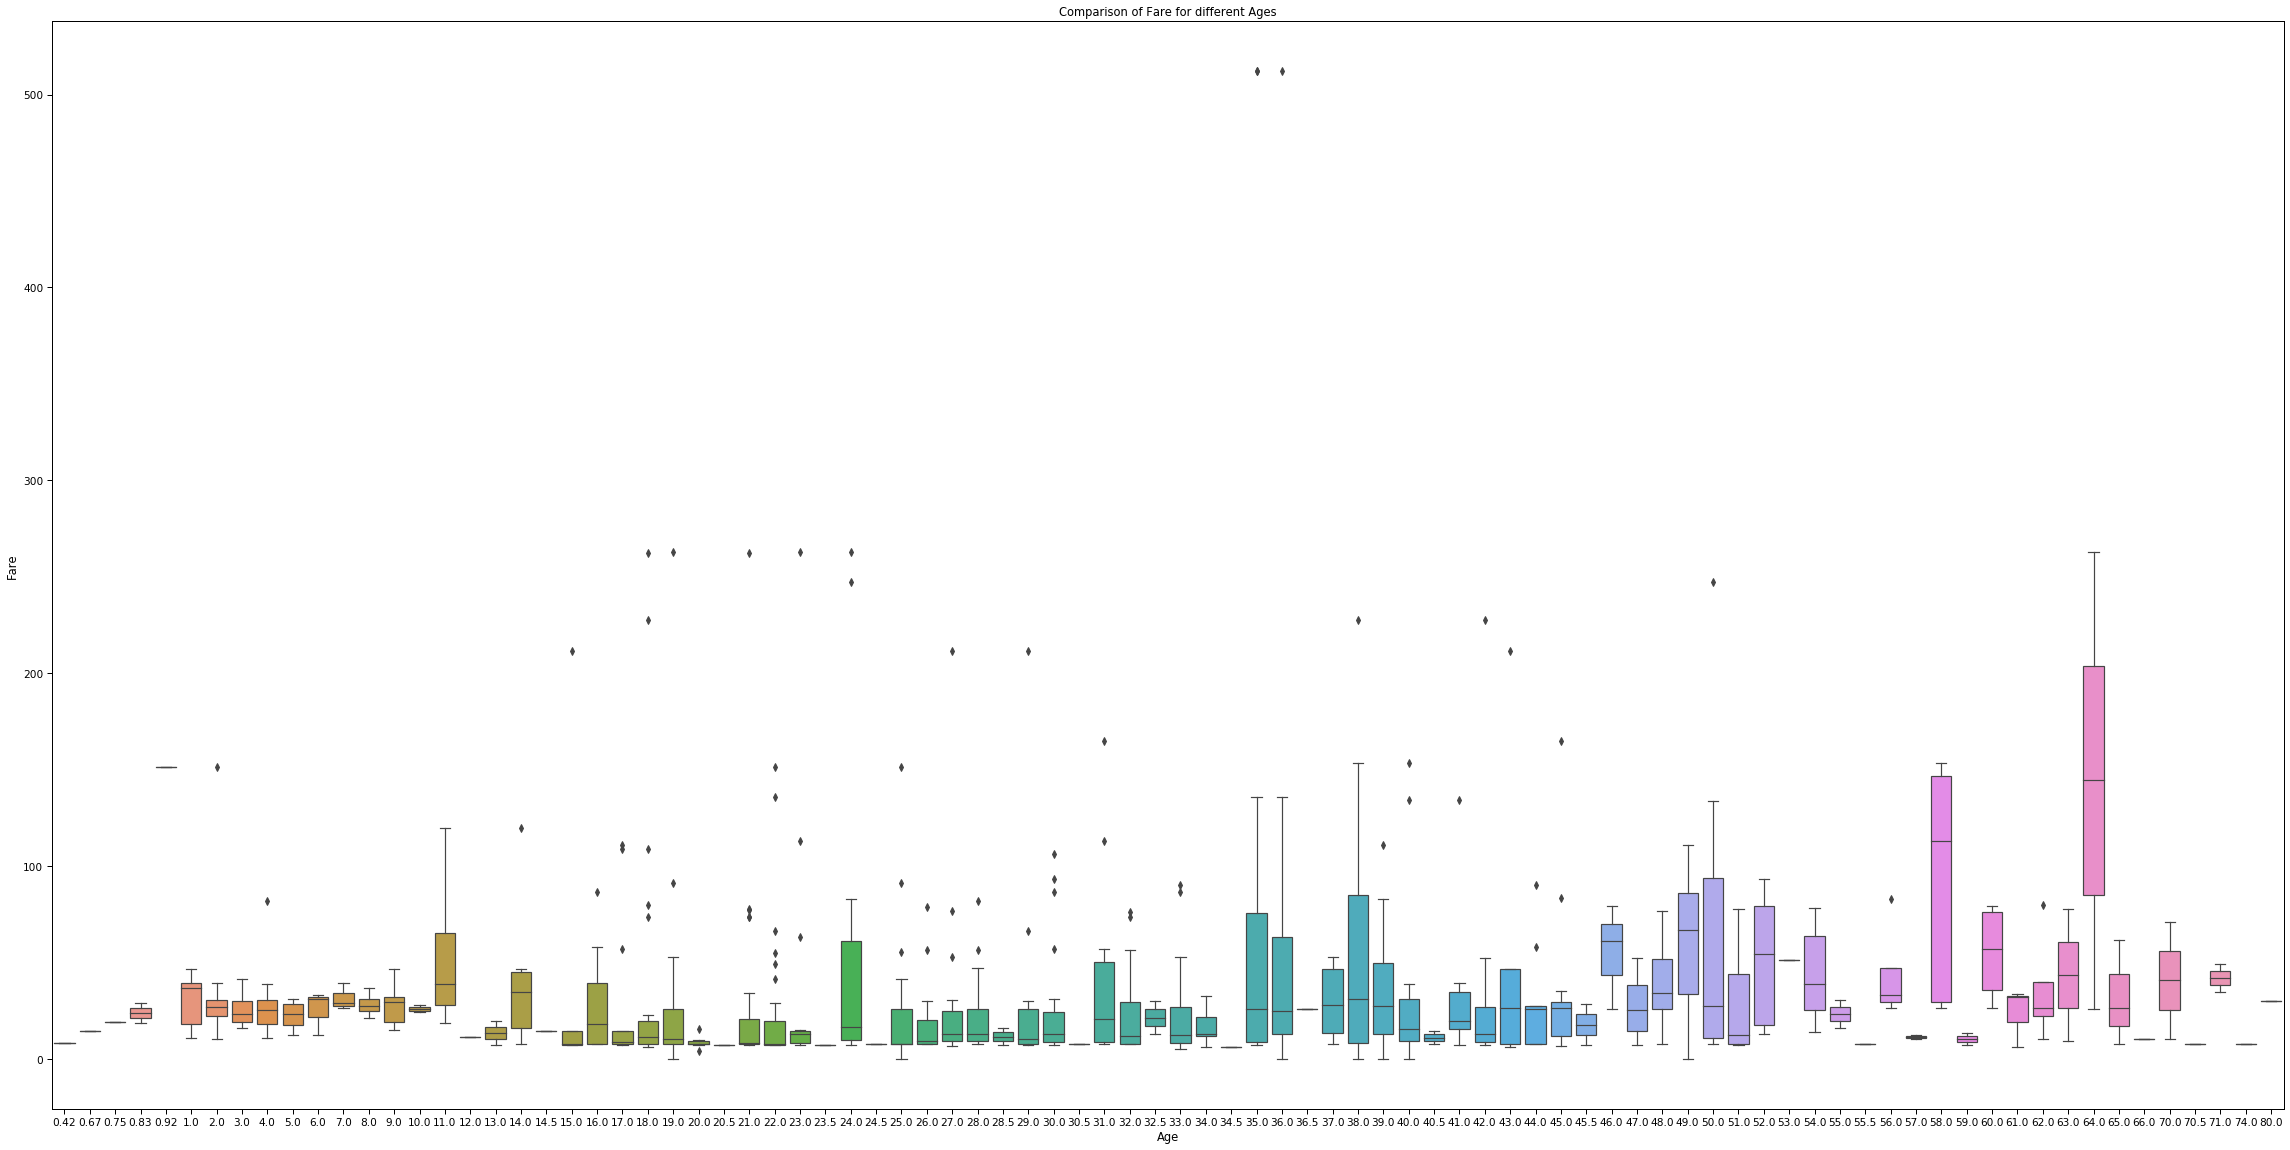

In [34]:
print_info(train, 'Fare')
train['Fare'].plot.hist(bins=40)
plt.title('Distribution of Fares')
plt.show()

#Plotting Fare with respect to Age
plt.figure(figsize = (40,20), frameon = True)
sns.set_context("paper", font_scale=1.2)
sns.boxplot(data=train, x='Age', y='Fare')
plt.title('Comparison of Fare for different Ages')
plt.show()

Above, fares paid by passengers of different age can be observed. There are a few outliers which are observed for Fare as shown in the boxplot above. The boxplot may require zooming in to view the data clearly.

Moving on, **'Cabin'** column is explored below which lists Cabin numbers for passengers.

In [35]:
print_info(train, 'Cabin')

train["Cabin"] 
Data Type                   :  object
Number of missing values    :  687
Percentage of missing values:  77.10437710437711 %
Number of unique values     :  148
Percentage of unique values :  16.610549943883278 %
First 50 unique values:
 ------------------ 
 [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118']


This is an object type column so data is to be engineered from this. However, more than 77% of the data are missing and the remaining data are mostly unique.
So, it is very difficult to impute any value here. Trying to impute values where a lot of the data are missing may cause learning models to overfit. Hence, it is best to drop this column altogether.

Next the final column to explore is the **'Embarked'** column which is the data about Port of Embarkation.

In [36]:
print_info(train, 'Embarked')

train["Embarked"] 
Data Type                   :  object
Number of missing values    :  2
Percentage of missing values:  0.22446689113355783 %
Number of unique values     :  4
Percentage of unique values :  0.44893378226711567 %
First 50 unique values:
 ------------------ 
 ['S' 'C' 'Q' nan]


In [37]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The three ports S, C and Q stand for Southampton, Cherbourg and Queenstown respectively. The Sounthampton port seems to have the most occurence, so 'S' will be imputed in the missing values of this column a shown below.

In [38]:
train['Embarked'].fillna('S', inplace=True)
train['Embarked'].isna().sum()

0

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null int64
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         891 non-null object
Title            891 non-null object
Family Aboard    891 non-null int64
Alone            891 non-null int64
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


As all our columns are now tidied up, it is time for imputing the missing values for **'Age'** column. Aggregate methods or some learning algorithm must be used to impute values on **'Age'** column.


However, before doing that, now is the best time to split out total training data available into separate training and validation sets. As the train dataframe was from Titanic datasets train.csv file, further split is needed in this to create new training and test sets. The reason behind doing the split now is because we do not want out training set's data to contain any data leakage from the test set. The aggregate methods and the learning algorithms used for impute methods take into consideration the whole dataset. Hence splitting at this point is recommended. However, we will save our dataset at this stage so that we will have a copy of cleaned dataset as a backup. Some columns can be deleted before saving as they are not needed any longer.

In [40]:
train.head()
train.to_csv('titanic_train_clean.csv')
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train.to_csv('titanic_train_clean_removed_columns.csv')

It also best to conduct one-hot-encoding for all our object type columns before splitting the data.

In [41]:
train_dummified = pd.get_dummies(train, drop_first=True)
train_dummified.to_csv('train_dummified.csv', header = train_dummified.columns.to_list(), index=False)
train_dummified

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family Aboard,Alone,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Special
0,0,3,1,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1,0,1,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1,0,1,0,0,0,0,1,0
887,1,1,0,19.0,0,0,30.0000,0,1,0,1,0,1,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,3,0,0,1,0,1,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,1,0,0,0,0,1,0,0,0


Finally, the data is ready for the split.

In [42]:
from sklearn.model_selection import train_test_split

X = train_dummified.drop('Survived', axis=1)
y = train_dummified['Survived']



X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state=1)

In [43]:
X_train.shape, y_train.shape

((534, 16), (534,))

In [44]:
X_valid.shape, y_valid.shape

((357, 16), (357,))

Above, the scikitLearn's train_test_split method is used to create our training and test sets.
The sizes of the splitted sets are checked to ensure they are correctly splitted.

Finally, now it is time to do the imputation for the **'Age'** without worrying about data leakage.

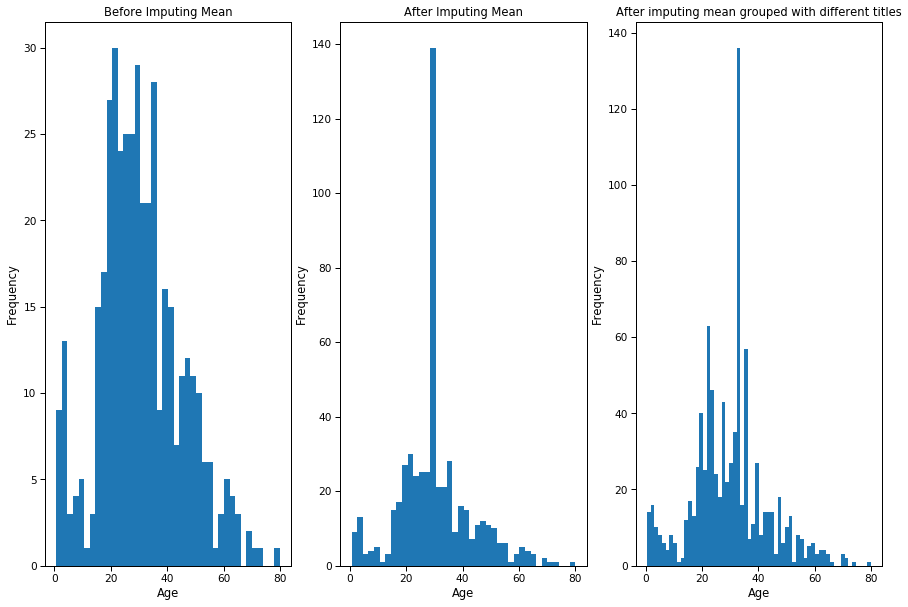

In [45]:
plt.figure(figsize=(15,10))

#Plot1 Age distribution before imputing mean age.
plt.subplot(1,3,1)
X_train['Age'].plot.hist(bins=40) #Plotting histogram before imputing mean for missing values
plt.title('Before Imputing Mean')
plt.xlabel('Age')

#Plot2 Age distribution after imputing mean age.
plt.subplot(1,3,2)
X_train['Age'].fillna(train['Age'].mean()).plot.hist(bins=40) #Plotting histogram after imputing mean.
plt.title('After Imputing Mean')
plt.xlabel('Age')

#Plot3 Age distribution after imputing mean grouped by Title
plt.subplot(1,3,3)
train.apply(lambda row: 
            train[train['Title'] == row['Title']]['Age'].mean()
                                if np.isnan(row['Age'])
                                else row['Age'], axis=1).plot.hist(bins=60)
plt.xlabel('Age')
plt.title('After imputing mean grouped with different titles')

plt.show()

As shown above, imputing the mean in both methods causes the distribution to significantly deviate from how its original distribution was. So, it is not so suitable to use mean as the impute method as this deviation will create a bias on the learning algorithms. Learning algorithm may be a better option to impute the missing values in **'Age'** column.

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
X_train_imp = pd.DataFrame(imp.transform(X_train), columns=X_train.columns.to_list())
X_valid_imp = pd.DataFrame(imp.transform(X_valid), columns=X_valid.columns.to_list())

Above, we imported the Multivariate Feature Imputation method 'IterativeImputer' in scikitLearn's impute class. We fit X_train on the imputer to learn how age is related to other features and transform X_train and X_valid to X_train_imp and X_valid_imp. Checking the null values and datatypes for both these sets show that there are no null values and all dataype is numeric.

Below is a code to plot the distribution X_train and X_valid before and after transforming using the IterativeImputer.

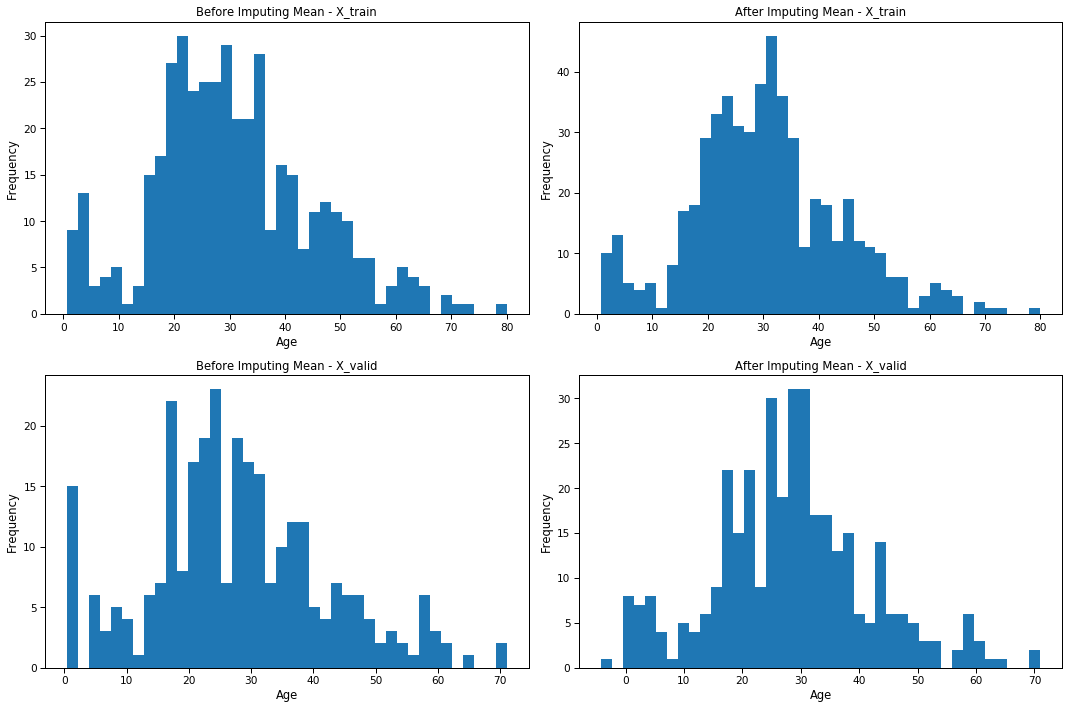

In [47]:
plt.figure(figsize=(15,10))

#Plot1 Age distribution before imputing mean age.
plt.subplot(2,2,1)
X_train['Age'].plot.hist(bins=40) #Plotting histogram before imputing mean for missing values
plt.title('Before Imputing Mean - X_train')
plt.xlabel('Age')

#Plot2 Age distribution after imputing mean age.
plt.subplot(2,2,2)
X_train_imp['Age'].plot.hist(bins=40) #Plotting histogram after imputing mean.
plt.title('After Imputing Mean - X_train')
plt.xlabel('Age')

#Plot1 Age distribution before imputing mean age.
plt.subplot(2,2,3)
X_valid['Age'].plot.hist(bins=40) #Plotting histogram before imputing mean for missing values
plt.title('Before Imputing Mean - X_valid')
plt.xlabel('Age')

#Plot3 Age distribution after imputing mean grouped by Title
plt.subplot(2,2,4)
X_valid_imp['Age'].plot.hist(bins=40) #Plotting histogram after imputing mean.
plt.title('After Imputing Mean - X_valid')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

The charts are now far less deviated than before. This is a good sign and we should now be able to check correlations between various features.

In [48]:
corr_mat = X_train_imp.corr()

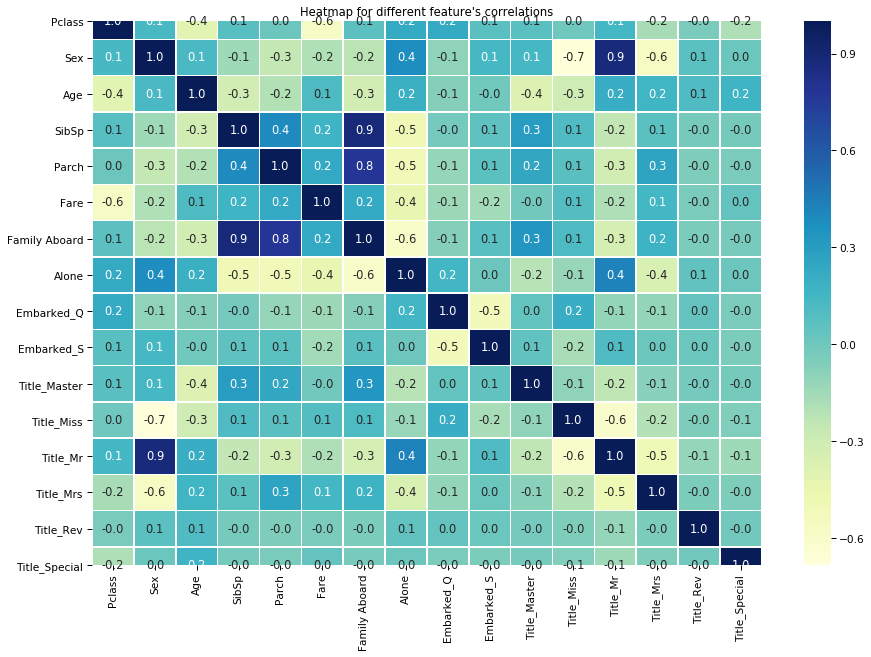

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_mat, annot=True,
            fmt=".1f", linewidths=.5, cmap='YlGnBu')
plt.title('Heatmap for different feature\'s correlations')
plt.show()

The heatmap shows which features are directly proportional and which are inversely proportional to one another. It also shows which features do not have much realtion with others. This is the end of Component 1 where the Exploratory Data Analysis within the titanic dataset was performed. Below is a code to export the current training and test datasets for use Component 2.

In [50]:
X_train_imp.to_csv('X_train.csv', header = X_train_imp.columns.to_list(), index=False)
y_train.to_csv('y_train.csv', header = False, index=False)
X_valid_imp.to_csv('X_valid.csv', header = X_valid_imp.columns.to_list(), index=False)
y_valid.to_csv('y_valid.csv', header = False, index=False)

Below is a function that includes all the changes we made to our training set in a serial order. This function will help wrangle the data in test.csv for which we need to make the prediction.
Since the data in this file must be modified the same way as training set, we repreat the steps taken on training set.

In [51]:
def transform_dataset(dataset):
    dataset['Title'] = dataset['Name'].apply(lambda row: re.findall(',(.*?)\.', row)[0].strip())
    dataset['Title'].replace('Mlle', 'Miss', inplace=True) 
                        #Mademoiselle in French to Miss
    dataset['Title'].replace('Mme', 'Mrs', inplace=True)
                            #Woman in French to Mrs
    dataset['Title'].replace('Ms', 'Miss', inplace=True) 
                            #Ms to Mrs

    dataset['Title'].replace(['Col', 'Major', 'Capt', 'Jonkheer',
                            'Sir', 'the Countess', 'Don', 'Lady']
                            , 'Special', inplace=True)
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1})
    dataset['Family Aboard'] = dataset['SibSp'] + dataset['Parch']
    dataset['Alone'] = dataset.apply(lambda row: 0 if (dataset[dataset['Ticket'] == row['Ticket']].shape[0]>1)
                                            | (row['Family Aboard']>0)
                                                  else 1, axis=1)
    dataset['Embarked'].fillna('S', inplace=True)
    dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return dataset

test_set = transform_dataset(test)

In [52]:
test_set['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Special', 'Rev', 'Dr', 'Dona'],
      dtype=object)

There is an additional 'Dona' title which is for woman in Spanish which can be converted to Mrs as well.

In [53]:
test_set['Title'].replace('Dona', 'Mrs', inplace=True)

Great! Now only thing remaining in the test set is to fill the NaN values using the imputer class that created earlier.

In [54]:
test_set.isna().sum()

Pclass            0
Sex               0
Age              86
SibSp             0
Parch             0
Fare              1
Embarked          0
Title             0
Family Aboard     0
Alone             0
dtype: int64

In [55]:
test_set = pd.get_dummies(test_set, drop_first=True)

In [56]:
test_set = pd.DataFrame(imp.transform(test_set), columns=test_set.columns.to_list())

In [57]:
test_set.isna().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Family Aboard    0
Alone            0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Rev        0
Title_Special    0
dtype: int64

The test set is ready to be fed into the learning algorithm for making predictions. So lets export this and save it in a csv file.

In [58]:
test_set.to_csv('test_set.csv', header = test_set.columns.to_list(), index=False)